#Intro

В данном скрипте реализован механизм поиска уни, би и триграмм по ключевой фразе по принципу косинусной близости векторов для модели **Word2Vec** библиотеки [Gensim](https://github.com/RaRe-Technologies/gensim).
В качестве обучающей выборки используются сниппеты ПС Яндекс по ключевой фразе для ТОП-100. Сниппеты лемматезированны и очищенны от стоп-слов.


# Readme

**0. Сохраните копию блокнота себе на диск**

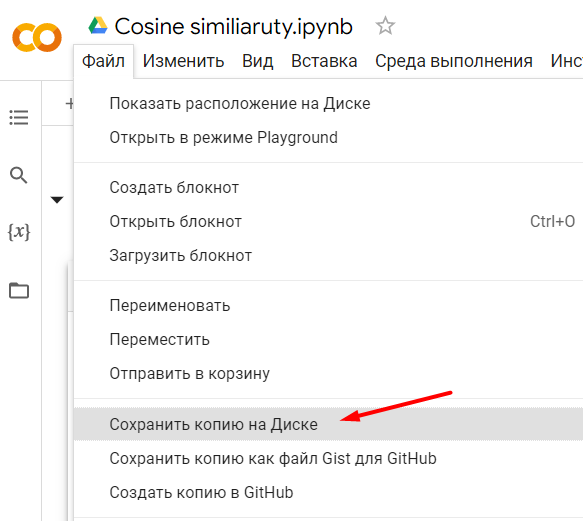

**1. Для работы вам понадобится XML url для совершения запросов**

**2. Пропишите этот url тут**
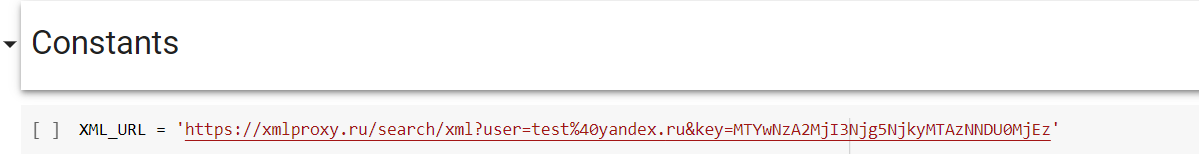

**3. Введите ключевую фразу тут**
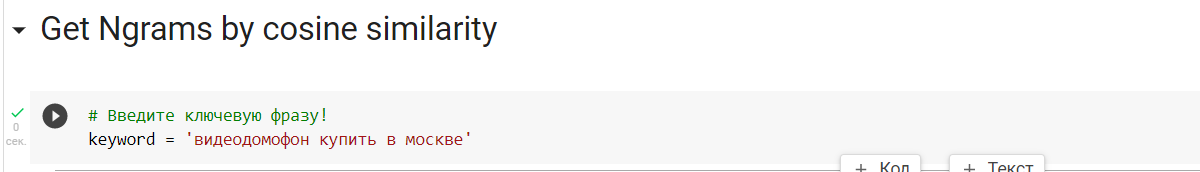

**4. Последовательно прощелкайте все треугольники**
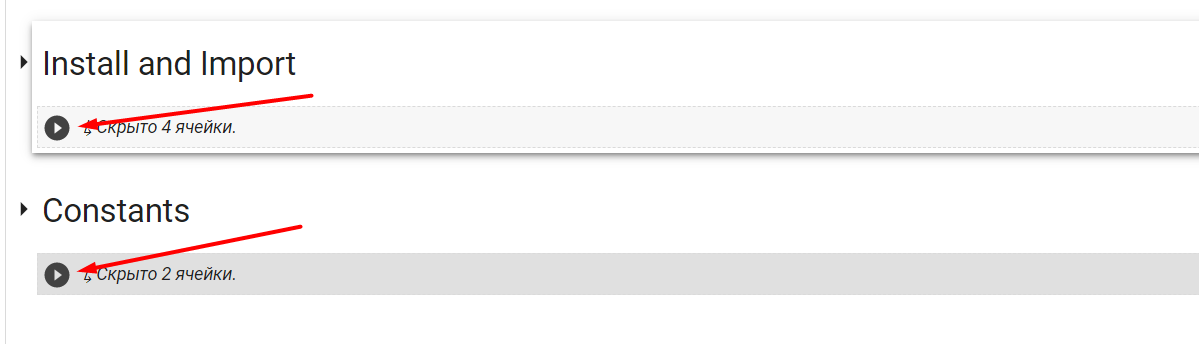

**5. Тюнинг скрипта.**

Можно поиграться с переменной "min_count" тут:

w2v_model = gensim.models.Word2Vec(tokenized, min_count=1)


Можно поиграться с количеством выводимых униграмм тут:

unigrams = w2v.similar_by_vector(key_vector, topn=30)


Можно поиграться с пороговыми значениями косинусной близости для биграмм и триграмм тут:

if cosine > 0.6:


#Install and Import

In [ ]:
pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 751 kB/s 
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 140 kB 23.6 MB/s 
     |████████████████████████████████| 106 kB 58.5 MB/s 
     |████████████████████████████████| 127 kB 69.9 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=ab51e97579ceb5da577c4a0e51128b6eaa80ad89043f71d7e3f5e8e363d11c7a
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
Successfully built parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 8.2 MB 6.4 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=c74851c97f1bc3011f2aca9ed0a36b8248927183ed74712f58623ab6e125edf0
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [ ]:
pip install html2text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from requests_html import HTMLSession
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
#from time import sleep
import gensim
import gensim.downloader as api
#from google.colab import drive
import pandas as pd
#import matplotlib.pyplot as plt # Подключаем модуль pyplot библиотеки matplotlib и задаем псевдоним plt
import numpy as np # Подключаем библиотеку numpy
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess
import html2text
import numpy as np
from numpy.linalg import norm
from nltk import ngrams

#Constants

In [ ]:
XML_URL = 'https://xmlproxy.ru/search/xml?user=test%40yandex.ru&key=MTYwNzA2MjI3Njg5NjkyMTNNDU0MjEz'

In [ ]:
geo = '213'
TOP = 100
maxpassages = 5
STOP_WORDS = ['без','более','будет','бывать','была','были','было','был','быть','бы','в','вам','вас','ваш','вдоль','ведь','весь','вместо','вне','внизу','вниз','внутри',
              'вокруг','вот','во','всегда','всего','всех','все','где','давай','давать','даже','да','для','достаточно','до','другой','его','ее','если','есть','еще','ещё',
              'её','же','за','заисключением','здесь','иза','вы','из','из-за','или','иметь','им','их','и','каждый','какой','как','как-то','когда','который','кроме','кто',
              'к','либо','ли','любая','люба','любой','между','мне','много','может','можно','мои','мой','мочь','мы','навсегда','надо','над','наиболее','наш','на','него',
              'нет','неё','не','ничего','ничто','но','нужно','нужный','ну','общий','однако','она','они','оно','он','отчего','от','очень','о','под','после','потому',
              'потомучто','почти','поэтому','по','при','про','пря','самый','свое','свой','себя','снова','со','с','также','такие','такой','так','там','тем','тех','те','того',
              'тоже','той','только','том','тот','то','тут','ты','уже','у','хотя','чего','чего-то','чей','чем','через','чтобы','что','чья','чьё','эта','эти','этот','это','email',
              'com','button','г.','я','а','меня','ему','теперь','вдруг','ни','нибудь','опять','уж','потом','ей','ней','тебя','сам','чтоб','будто','раз','себе','ж','тогда',
              'этого','совсем','ним','этом','один','нее','сейчас','куда','зачем','никогда','наконец','два','об','хоть','больше','нас','них','какая','разве','три','эту','моя',
              'впрочем','хорошо','свою','этой','перед','иногда','лучше','чуть','нельзя','конечно','всю', 'наш'] 
PREPOSITIONS = ('-','‒','—','!','#','$','%','&','(',')','*',',','.','/',':',';','?','@','[',']','^','_','{','|','}','~','¡','¦','¿','‘',
               '’','‽','¤','+','<','=','>','§','©','®','°','¶','•','‰','‱','№','`','\n','\t', '«', '»', '"', '\\', '😊', '✔', '⭐','\\n','\\t', '\xa0')
stop_words = []
for word in STOP_WORDS:
  stop_words.append(morph.parse(word)[0].normal_form)
stop_words = set(stop_words)
stop_words = list(stop_words)

# Get Ngrams by cosine similarity

In [ ]:
# Введите ключевую фразу!
keyword = 'видеодомофон купить в москве'

In [ ]:
def yandex_xml(keyword):
    '''
    На вход подаётся ключевая фраза
    На выходе Pandas датафрейм с колонками: url, domain, токенизированные сниппеты, 
    токенизированные нормализованные сниппеты и Word2Vec обученная на сниппетах модель 
    '''
    keyword = keyword.replace('  ', ' ').replace('   ', ' ') # Удалаяем лишние пробелы
    keyword = '%20'.join(keyword.split())
    url = f'{XML_URL}&query={keyword}&lr={geo}&l10n=ru&sortby=rlv&maxpassages=5&groupby=attr%3Dd.mode%3Ddeep.groups-on-page%3D{TOP}.docs-in-group%3D1'
    #print(url)

    with HTMLSession() as session:
        try:
            resp = session.get(url)
            #print(resp)
        except Exception as e:
            print(e)
    #print(resp.text)

    xp = resp.html.xpath('//group')
    df = pd.DataFrame(data=[[xp[i].xpath('//url/text()')[0].lower() for i in range(TOP)], [xp[i].xpath('//domain/text()')[0].lower() for i in range(TOP)]])
    df = df.T #Транспозиция датафрейма
    df = df.rename(columns={0: "url", 1: "domain"})
    df['snippet'] = ''
    df['morph'] = ''
    df['title'] = ''
    df['page_text'] = ''


    # Токенизация и нормализация пассажей
    for i in range(df.shape[0]):
        try:
            snip = xp[i].xpath('//passages')[0].text.replace('\n', ' ')
        except:
            snip = xp[i].xpath('//headline')[0].text.replace('\n', ' ')

        document = gensim.utils.simple_preprocess(snip)   
        df.snippet[i] = document
        df.morph[i] = [morph.parse(word)[0].normal_form for word in document if morph.parse(word)[0].normal_form not in stop_words]

    
    # Word2Vec предобученная модель
    tokenized = [df['morph'][i] for i in range(df.shape[0])]
    #w2v_model = gensim.models.Word2Vec(tokenized)
    w2v_model = gensim.models.Word2Vec(tokenized, min_count=1)

    return df, w2v_model

In [ ]:
keyword = [morph.parse(key)[0].normal_form for key in keyword.split() if morph.parse(key)[0].normal_form not in stop_words]  # Лемматизация и удаление стоп-слов
get_yandex_xml = yandex_xml(' '.join(keyword))
df = get_yandex_xml[0]
w2v = get_yandex_xml[1]


# Вычисляем координаты вектора key_vector для ключевого слова keyword
key_vector = 0
for word in keyword:
    key_vector = key_vector + w2v[word]


# Униграммы
unigrams = w2v.similar_by_vector(key_vector, topn=30) # topn - количество выводимых униграмм


# Биграммы
bigrames = []
for i in range(100):
  sentence = ' '.join(df.morph[i])
  for grams in ngrams(sentence.split(), 2):
      try:
          word = w2v[grams[0]] + w2v[grams[1]] 
          cosine = np.dot(key_vector,word)/(norm(key_vector)*norm(word))

          if cosine > 0.6: # Порог по косинусной близости, можно поиграться с цифрами
              bigrames.append(' '.join(grams))
      except:
          continue
bigrames = set(bigrames)


# Триграммы
trigrams = []
for i in range(100):
  sentence = ' '.join(df.morph[i])
  for grams in ngrams(sentence.split(), 3):
      try:
          word = w2v[grams[0]] + w2v[grams[1]] + w2v[grams[2]] 
          cosine = np.dot(key_vector,word)/(norm(key_vector)*norm(word))
          
          if cosine > 0.7: # Порог по косинусной близости, можно поиграться с цифрами
              trigrams.append(' '.join(grams))
      except:
          continue
trigrams = set(trigrams)

keyword = ' '.join(keyword)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
unigrams

[('видеодомофон', 0.7136939167976379),
 ('москва', 0.6050115823745728),
 ('купить', 0.5110640525817871),
 ('вызов', 0.3924386501312256),
 ('доступный', 0.39000263810157776),
 ('фото', 0.3748553991317749),
 ('модель', 0.3536340892314911),
 ('широкий', 0.33130985498428345),
 ('монитор', 0.32251060009002686),
 ('отдел', 0.319085031747818),
 ('магазин', 0.30997928977012634),
 ('отзыв', 0.29765981435775757),
 ('дверь', 0.29574358463287354),
 ('экран', 0.2889225482940674),
 ('интернет', 0.28795039653778076),
 ('работа', 0.28217875957489014),
 ('гарантия', 0.27985137701034546),
 ('дом', 0.2784590721130371),
 ('камера', 0.27774831652641296),
 ('вызоваоткрыть', 0.2755885124206543),
 ('склад', 0.27121299505233765),
 ('требование', 0.269647479057312),
 ('выходить', 0.2691214680671692),
 ('посетитель', 0.2656908631324768),
 ('оставить', 0.26370513439178467),
 ('химки', 0.2592383027076721),
 ('сенсорный', 0.2579145133495331),
 ('официальный', 0.25776633620262146),
 ('непрошеный', 0.2537868618965149

In [ ]:
bigrames

{'hd видеодомофон',
 'ip видеодомофон',
 'беспроводный видеодомофон',
 'видеодомофон aliexpress',
 'видеодомофон pal',
 'видеодомофон видеодомофон',
 'видеодомофон встроить',
 'видеодомофон выгодный',
 'видеодомофон вызывной',
 'видеодомофон гарантия',
 'видеодомофон диагональ',
 'видеодомофон дисплей',
 'видеодомофон дом',
 'видеодомофон доступный',
 'видеодомофон дюйм',
 'видеодомофон заказать',
 'видеодомофон интернет',
 'видеодомофон источник',
 'видеодомофон каталог',
 'видеодомофон квартира',
 'видеодомофон комплект',
 'видеодомофон купить',
 'видеодомофон магазин',
 'видеодомофон максимальный',
 'видеодомофон модель',
 'видеодомофон модуль',
 'видеодомофон монитор',
 'видеодомофон москва',
 'видеодомофон наличие',
 'видеодомофон недорого',
 'видеодомофон низкий',
 'видеодомофон онлайн',
 'видеодомофон отвечать',
 'видеодомофон отдел',
 'видеодомофон отзыв',
 'видеодомофон офис',
 'видеодомофон подключение',
 'видеодомофон помочь',
 'видеодомофон проводить',
 'видеодомофон просто

In [ ]:
trigrams

{'ru купить видеодомофон',
 'system купить видеодомофон',
 'беспроводный видеодомофон москва',
 'видеодомофон видеодомофон купить',
 'видеодомофон видеодомофон устройство',
 'видеодомофон доставка москва',
 'видеодомофон интернет магазин',
 'видеодомофон квартира купить',
 'видеодомофон ключ москва',
 'видеодомофон купить видеодомофон',
 'видеодомофон купить выгодный',
 'видеодомофон купить дом',
 'видеодомофон купить москва',
 'видеодомофон купить топ',
 'видеодомофон магазин москва',
 'видеодомофон монитор видеодомофон',
 'видеодомофон москва воспользоваться',
 'видеодомофон москва выгодный',
 'видеодомофон москва дом',
 'видеодомофон москва доставка',
 'видеодомофон москва каталог',
 'видеодомофон москва компания',
 'видеодомофон москва консультант',
 'видеодомофон москва найти',
 'видеодомофон москва недорого',
 'видеодомофон москва отзыв',
 'видеодомофон москва рекомендовать',
 'видеодомофон москва россия',
 'видеодомофон москва самовывоз',
 'видеодомофон москва точный',
 'видеодо